In [1]:
compressed_video = '../data/compressed_videos/output_h264.mp4'

In [2]:
# Temporal Reconstruction with pix2pix or Stable Diffusion Img to Img 

In [3]:
f1 = '../data/Jockey/frame_001.png'
f10 = '../data/Jockey/frame_002.png'

# now we need to construct 8 frames between them 

In [4]:
from PIL import Image
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()

/data/maryam.sana/anaconda3/envs/compressai/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|███████████████████████████████████████| 7/7 [00:00<00:00, 10.20it/s]


In [5]:
#init_image will be f1 and prompt will be calculated while considering difference between f2 and f1 

In [11]:
from transformers import AutoProcessor, LlavaForConditionalGeneration

model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf")
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")
prompt = "<image>\nUSER:Describe the objects in the picture, please also provide information about the motion direction of any moving objects within the image ?\nASSISTANT:"

Loading checkpoint shards: 100%|████████████████████████████████████████████| 3/3 [00:05<00:00,  1.73s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [12]:
def get_prompt(image):
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    generate_ids = model.generate(**inputs, max_length=200)
    caption_llava = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
    return caption_llava.split('ASSISTANT:')[1]

In [13]:
prompt_image = Image.open(f10)
prompt = get_prompt(prompt_image)

In [14]:
print(prompt)

 The image features a man riding a brown horse on a grassy field. The man is wearing a yellow shirt and a red and white jacket. The horse is galloping, indicating that it is moving quickly. The scene appears to be set in a race track, as there are several other people in the background, possibly spectators or fellow racers. The overall atmosphere of the image suggests an exciting and competitive event.


In [15]:
p='next step of the horse given in the init image in the same scene'

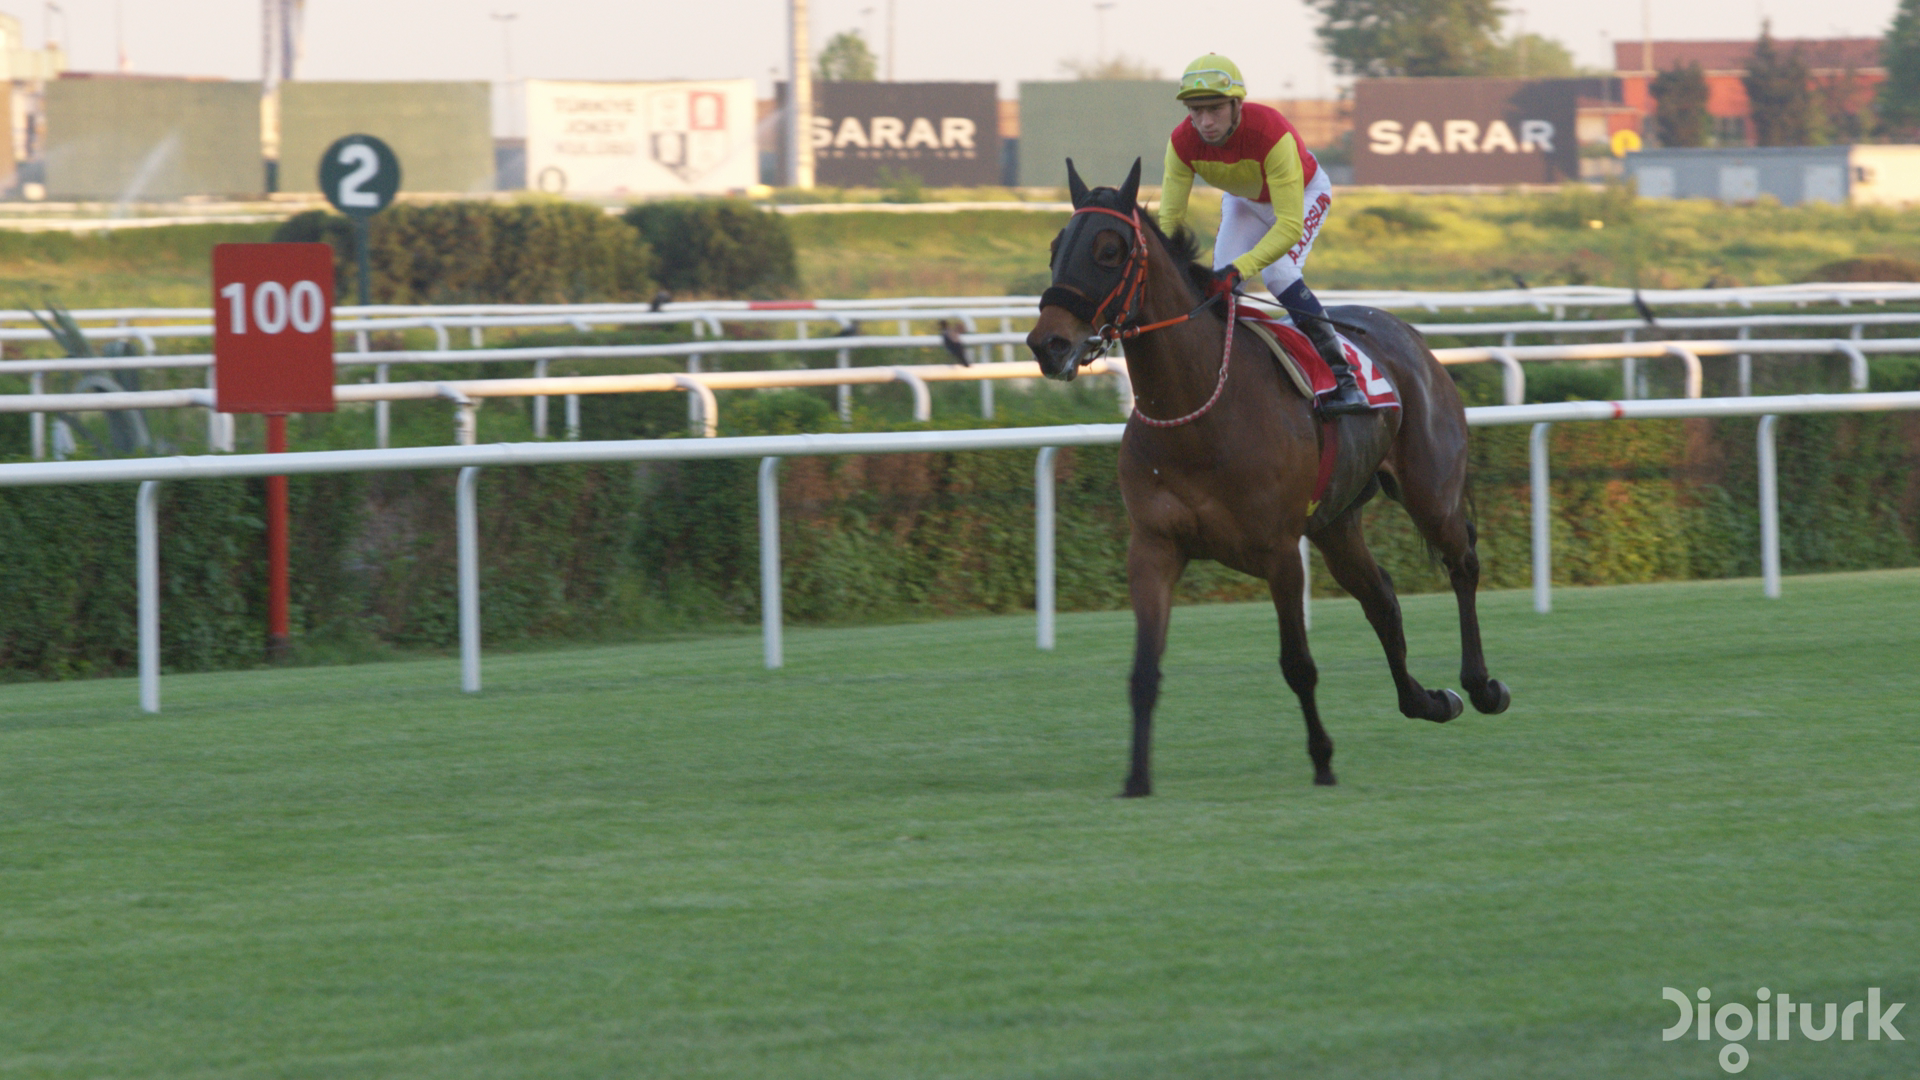

In [17]:
init_image

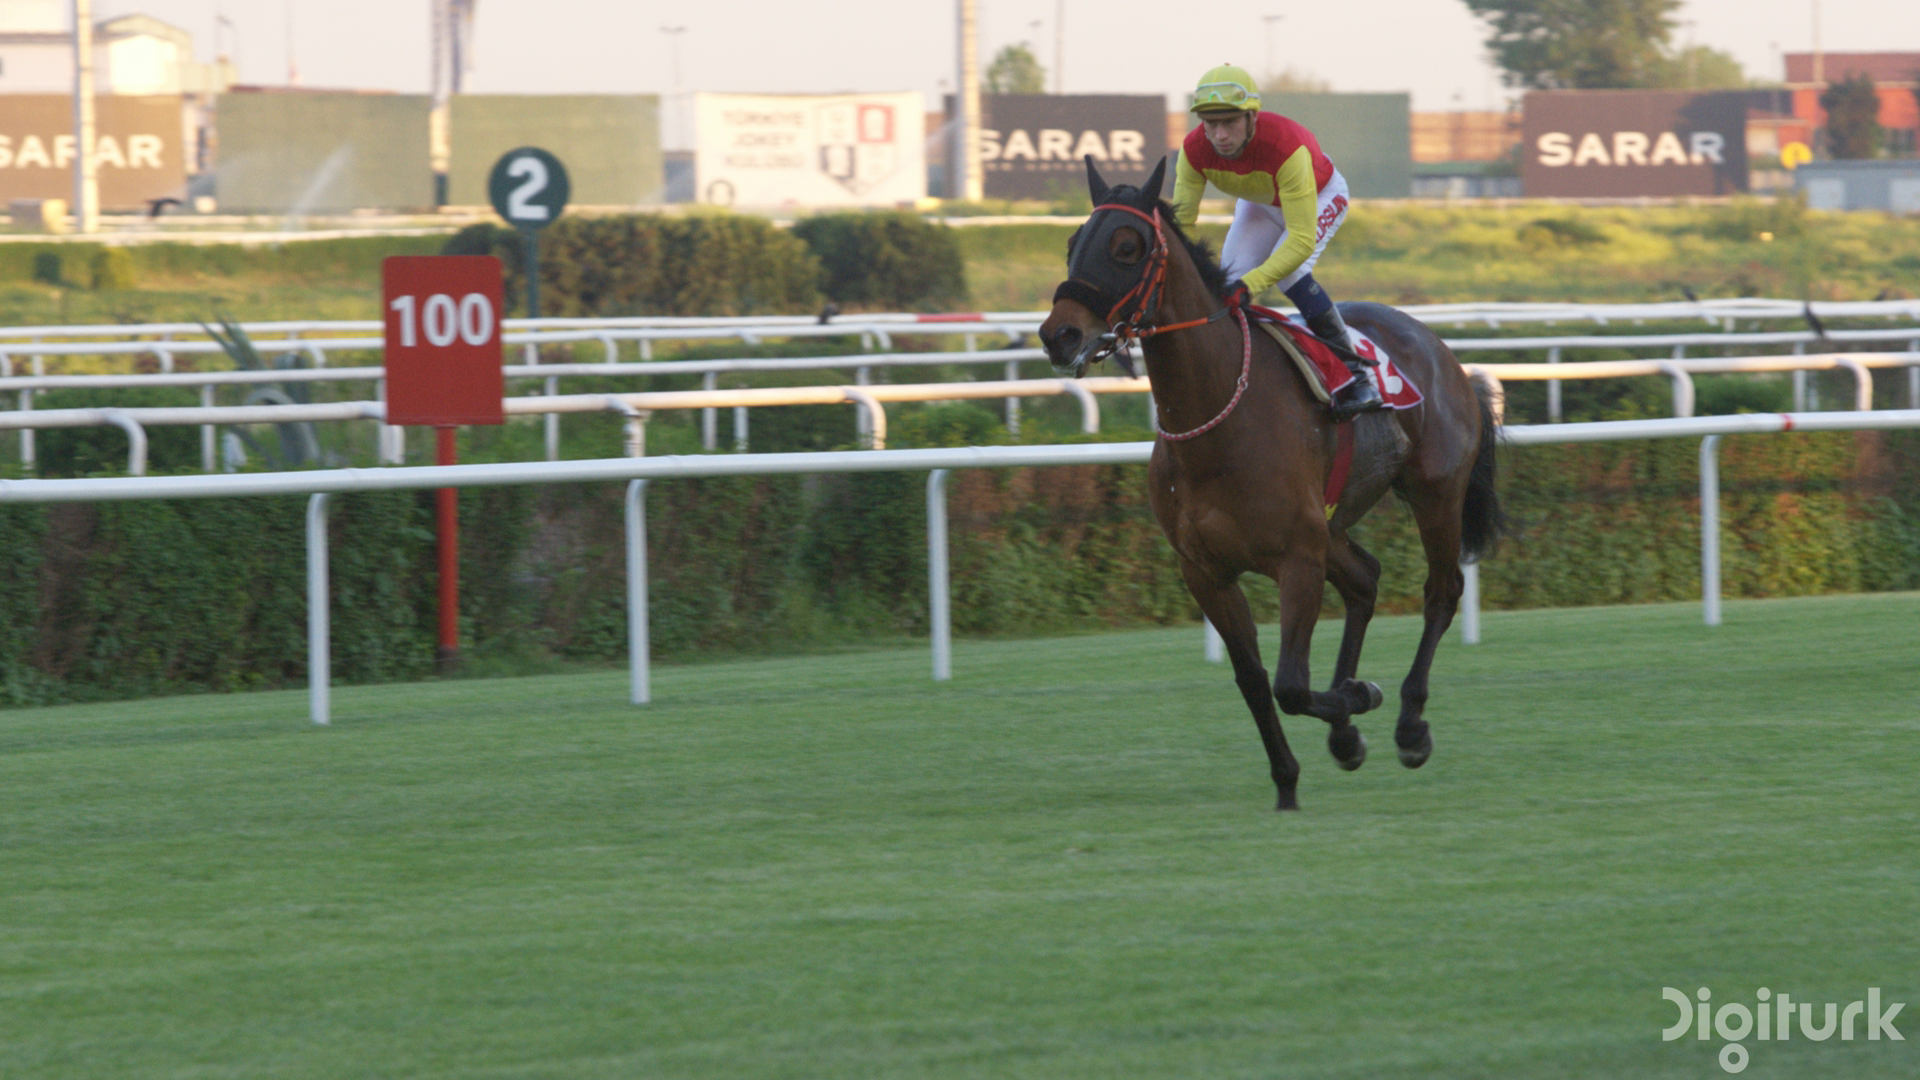

In [18]:
prompt_image

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['suggests an exciting and competitive event.']
100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 14.88it/s]


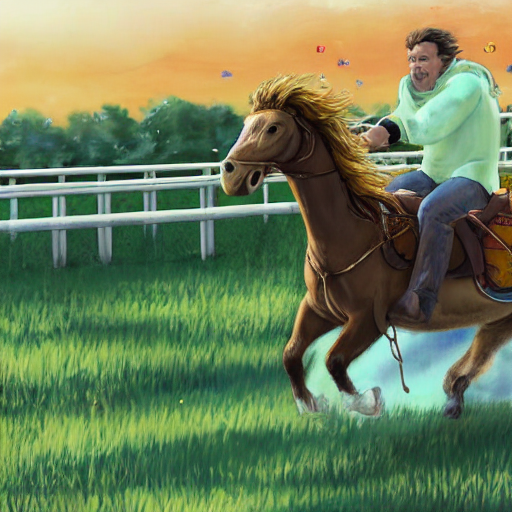

In [21]:
init_image = Image.open(f1)
init_image = init_image.resize((512, 512))
f5 = pipeline(prompt, image=init_image).images[0]
f5

In [20]:
f5.size

(1920, 1080)